In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Terry_Stops.csv')

data.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00.0000000,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00.0000000,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00.0000000,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00.0000000,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00.0000000,-,-,-,NaN,N,N,-,-,-


In [3]:
#look at data for dtypes and null values, cleaning

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52107 entries, 0 to 52106
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         52107 non-null  object
 1   Subject ID                52107 non-null  int64 
 2   GO / SC Num               52107 non-null  int64 
 3   Terry Stop ID             52107 non-null  int64 
 4   Stop Resolution           52107 non-null  object
 5   Weapon Type               52107 non-null  object
 6   Officer ID                52107 non-null  object
 7   Officer YOB               52107 non-null  int64 
 8   Officer Gender            52107 non-null  object
 9   Officer Race              52107 non-null  object
 10  Subject Perceived Race    52107 non-null  object
 11  Subject Perceived Gender  52107 non-null  object
 12  Reported Date             52107 non-null  object
 13  Reported Time             52107 non-null  object
 14  Initial Call Type     

In [4]:
#all columns seem to match up except for one, shown more clearly below

In [5]:
data.isnull().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               486
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

In [6]:
#officer squad has null values

In [7]:
data['Officer Squad'].value_counts()

TRAINING - FIELD TRAINING SQUAD           5532
WEST PCT 1ST W - DAVID/MARY               1664
SOUTHWEST PCT 2ND W - FRANK               1129
WEST PCT 2ND W - D/M RELIEF               1098
WEST PCT 1ST W - KING/QUEEN               1013
                                          ... 
BURG/THEFT/JUV - WEST                        1
TRAINING - ADVANCED - SQUAD C                1
FORENSICS - CRIME SCENE INVESTIGATIONS       1
TRAF - MOTORCYCLE - T2 SQUAD                 1
TRAF - MOTORCYCLE UNIT - T2 SQUAD            1
Name: Officer Squad, Length: 184, dtype: int64

In [8]:
#this data not relevant to current objective anyway

data_nulls_removed = data.drop(['Officer Squad'], axis=1)

#now check other columns for things to drop

The page on data.seattle.gov lists descriptions for each column as the following:

###### Subject Age Group	
Subject Age Group (10 year increments) as reported by the officer.
###### Subject ID	
Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.
###### GO / SC Num
General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.
###### Terry Stop ID	
Key identifying unique Terry Stop reports.
###### Stop Resolution	
Resolution of the stop as reported by the officer.
###### Weapon Type	
Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.
###### Officer ID	
Key identifying unique officers in the dataset.
###### Officer YOB	
Year of birth, as reported by the officer.
###### Officer Gender	
Gender of the officer, as reported by the officer.
###### Officer Race	
Race of the officer, as reported by the officer.
###### Subject Perceived Race	
Perceived race of the subject, as reported by the officer.
###### Subject Perceived Gender	
Perceived gender of the subject, as reported by the officer.
###### Reported Date	
Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.
###### Date & Time
Reported Time	
Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.
###### Initial Call Type	
Initial classification of the call as assigned by 911.
###### Final Call Type	
Final classification of the call as assigned by the primary officer closing the event.
###### Call Type	
How the call was received by the communication center.
###### Officer Squad	
Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).
###### Arrest Flag	
Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).
###### Frisk Flag	
Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.
###### Precinct	
Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
###### Sector	
Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.
###### Beat	
Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

Reported Time does not apply to this study, and Reported Date will be used with Officer YOB to create a new column, the approximate Officer Age.

ID numbers arent useful for creating a data model.

Likewise, the Precinct, Sector, and Beat information are not significant to this study. Future examinations could of course use this data to examine how individual precincts or sectors engage in racial or gender bias in Terry Stops.

Stop Resolution Contains information that could be redundant, since we already have information on whether the subject was frisked and/or arrested.



In [55]:
data_nulls_removed['Reported_Year'] = data_nulls_removed['Reported Date'].str[:4].astype(int)
data_nulls_removed['Officer_Age'] = data_nulls_removed['Reported_Year']-data_nulls_removed['Officer YOB']

drop_list = ['Reported Date', 'Officer YOB','Subject ID', 'Terry Stop ID', 'Officer ID',  'GO / SC Num', 'Precinct', 'Sector', 
             'Beat', 'Stop Resolution', 'Reported Time']

df = data_nulls_removed.drop(drop_list, axis=1)

In [56]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,Subject_Age_Group,Weapon_Type,Officer_Gender,Officer_Race,Subject_Perceived_Race,Subject_Perceived_Gender,Initial_Call_Type,Final_Call_Type,Call_Type,Arrest_Flag,Frisk_Flag,Reported_Year,Officer_Age
0,-,None,M,Black or African American,Asian,Male,-,-,-,N,N,2015,31
1,-,None,M,White,-,-,-,-,-,N,N,2015,50
2,-,None,M,White,White,Male,-,-,-,N,-,2015,54
3,-,None,M,White,-,-,-,-,-,N,N,2015,52
4,-,None,M,White,Black or African American,Male,-,-,-,N,N,2015,38


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52107 entries, 0 to 52106
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject_Age_Group         52107 non-null  object
 1   Weapon_Type               52107 non-null  object
 2   Officer_Gender            52107 non-null  object
 3   Officer_Race              52107 non-null  object
 4   Subject_Perceived_Race    52107 non-null  object
 5   Subject_Perceived_Gender  52107 non-null  object
 6   Initial_Call_Type         52107 non-null  object
 7   Final_Call_Type           52107 non-null  object
 8   Call_Type                 52107 non-null  object
 9   Arrest_Flag               52107 non-null  object
 10  Frisk_Flag                52107 non-null  object
 11  Reported_Year             52107 non-null  int32 
 12  Officer_Age               52107 non-null  int64 
dtypes: int32(1), int64(1), object(11)
memory usage: 5.0+ MB


We now observe what sort of data is in the columns that remain.

In [58]:
df['Subject_Age_Group'].value_counts().sort_index(ascending=True)

-                1765
1 - 17           2057
18 - 25         10272
26 - 35         17400
36 - 45         11225
46 - 55          6703
56 and Above     2685
Name: Subject_Age_Group, dtype: int64

In [59]:
df['Weapon_Type'].value_counts()

None                                    32565
-                                       16377
Lethal Cutting Instrument                1482
Knife/Cutting/Stabbing Instrument         877
Handgun                                   330
Blunt Object/Striking Implement           116
Firearm Other                             100
Firearm                                    59
Club, Blackjack, Brass Knuckles            49
Mace/Pepper Spray                          40
Other Firearm                              38
Firearm (unk type)                         15
Taser/Stun Gun                             12
Fire/Incendiary Device                     11
Club                                        9
None/Not Applicable                         9
Rifle                                       8
Shotgun                                     4
Automatic Handgun                           2
Personal Weapons (hands, feet, etc.)        2
Blackjack                                   1
Brass Knuckles                    

For the sake of clarity, we will separate weapon data into whether or not a weapon was reported. The specific type of weapon is not significant to our analysis.

In [60]:
#separate weapon type data ################MESSSYYYYYYYYYYYYYYYYYYYYYYYYYYYY

unarmed = ['None', '-', 'None/Not Applicable','Personal Weapons (hands, feet, etc.)']

df['Weapon_Reported'] = df['Weapon_Type']

df['Weapon_Type'].replace(unarmed, 'No Weapon Reported' , inplace=True)


df['Weapon_Reported'][df['Weapon_Type'] != 'No Weapon Reported'] = 'Weapon Reported'

df.drop(['Weapon_Type'], axis=1, inplace=True)

df['Weapon_Reported'].value_counts()

<ipython-input-60-62708d927e45>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weapon_Reported'][df['Weapon_Type'] != 'No Weapon Reported'] = 'Weapon Reported'


None                                    32565
-                                       16377
Weapon Reported                          3154
None/Not Applicable                         9
Personal Weapons (hands, feet, etc.)        2
Name: Weapon_Reported, dtype: int64

In [61]:
df['Officer_Gender'].value_counts()

M    46143
F     5934
N       30
Name: Officer_Gender, dtype: int64

In [62]:
df['Officer_Race'].value_counts()

White                            38419
Hispanic or Latino                3146
Two or More Races                 3068
Asian                             2377
Not Specified                     2172
Black or African American         2081
Nat Hawaiian/Oth Pac Islander      479
American Indian/Alaska Native      329
Unknown                             36
Name: Officer_Race, dtype: int64

In [63]:
df['Subject_Perceived_Race'].value_counts()

White                                        25490
Black or African American                    15521
Unknown                                       3337
-                                             1809
Asian                                         1738
Hispanic                                      1684
American Indian or Alaska Native              1476
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       91
Name: Subject_Perceived_Race, dtype: int64

In [64]:
df['Subject_Perceived_Gender'].value_counts()

Male                                                         40997
Female                                                       10470
Unable to Determine                                            326
-                                                              238
Unknown                                                         60
Gender Diverse (gender non-conforming and/or transgender)       16
Name: Subject_Perceived_Gender, dtype: int64

For the sake of this analysis, we will group together all perceived Genders that do not fall under the category of Male or Female into one value, using "N" to match the existing Officer Gender Data.

In [65]:
n_gender = ['-', 'Unknown', 'Gender Diverse (gender non-conforming and/or transgender)', 'Unable to Determine']

df['Subject_Perceived_Gender'].replace('Male', 'M' , inplace=True)
df['Subject_Perceived_Gender'].replace('Female', 'F' , inplace=True)
df['Subject_Perceived_Gender'].replace(n_gender, 'N' , inplace=True)

df['Subject_Perceived_Gender'].value_counts()

M    40997
F    10470
N      640
Name: Subject_Perceived_Gender, dtype: int64

In [66]:
pd.set_option("display.max_rows", None)
df['Initial_Call_Type'].value_counts()

-                                                     13461
SUSPICIOUS STOP - OFFICER INITIATED ONVIEW             3601
SUSPICIOUS PERSON, VEHICLE OR INCIDENT                 3454
DISTURBANCE, MISCELLANEOUS/OTHER                       2657
ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS)         2283
TRESPASS                                               2094
SHOPLIFT - THEFT                                       1577
THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS)              1546
FIGHT - IP - PHYSICAL (NO WEAPONS)                     1414
WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)         1260
ROBBERY - IP/JO (INCLUDES STRONG ARM)                  1000
BURG - IP/JO - RES (INCL UNOCC STRUCTURES)              974
THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING)           884
AUTO RECOVERY                                           856
NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)        805
DIST - IP/JO - DV DIST - NO ASLT                        771
PROPERTY - DAMAGE                       

In [67]:
df['Final_Call_Type'].value_counts()

-                                                     13461
--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON               4404
--PROWLER - TRESPASS                                   3600
--DISTURBANCE - OTHER                                  2979
--ASSAULTS, OTHER                                      2536
--WARRANT SERVICES - FELONY                            1798
--THEFT - SHOPLIFT                                     1427
--DV - ARGUMENTS, DISTURBANCE (NO ARREST)              1424
--DV - DOMESTIC VIOL/ASLT (ARREST MANDATORY)           1317
--ASSAULTS - HARASSMENT, THREATS                       1186
--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE              1148
--WARRANT SERVICES - MISDEMEANOR                       1084
--NARCOTICS - OTHER                                    1027
--CRISIS COMPLAINT - GENERAL                            982
--THEFT - ALL OTHER                                     875
--PROPERTY DEST (DAMG)                                  819
--BURGLARY - NON RESIDENTIAL/COMMERCIAL 

In [68]:
df['Call_Type'].value_counts()

911                              24027
-                                13461
ONVIEW                           10563
TELEPHONE OTHER, NOT 911          3619
ALARM CALL (NOT POLICE ALARM)      421
TEXT MESSAGE                        15
SCHEDULED EVENT (RECURRING)          1
Name: Call_Type, dtype: int64

In [69]:
df['Arrest_Flag'].value_counts()

N    47468
Y     4639
Name: Arrest_Flag, dtype: int64

In [70]:
df['Frisk_Flag'].value_counts()

N    39636
Y    11993
-      478
Name: Frisk_Flag, dtype: int64

In [71]:
df['Officer_Age'].value_counts().sort_index(ascending=True)

21       19
22      257
23      990
24     1918
25     2211
26     2635
27     2504
28     2825
29     2987
30     3169
31     3375
32     3078
33     3036
34     2814
35     2241
36     1610
37     1475
38     1348
39     1176
40     1153
41      956
42     1075
43      772
44      835
45      848
46      883
47      678
48      697
49      631
50      607
51      485
52      422
53      423
54      484
55      372
56      277
57      259
58      204
59      101
60       88
61       46
62       19
63       36
64       14
65       16
66        2
67       12
68        6
69        1
70        1
115       1
116       2
117       1
118       3
119      28
121       1
Name: Officer_Age, dtype: int64

It's unlikely that there are officers over 100 years old making this arrests, and very few entries contain this odd data, so we will remove them.

In [72]:
df = df[df['Officer_Age']<100]
df['Officer_Age'].value_counts().sort_index(ascending=True)

21      19
22     257
23     990
24    1918
25    2211
26    2635
27    2504
28    2825
29    2987
30    3169
31    3375
32    3078
33    3036
34    2814
35    2241
36    1610
37    1475
38    1348
39    1176
40    1153
41     956
42    1075
43     772
44     835
45     848
46     883
47     678
48     697
49     631
50     607
51     485
52     422
53     423
54     484
55     372
56     277
57     259
58     204
59     101
60      88
61      46
62      19
63      36
64      14
65      16
66       2
67      12
68       6
69       1
70       1
Name: Officer_Age, dtype: int64

In [73]:
df['Reported_Year'].value_counts().sort_index(ascending=True)

2015    7058
2016    7713
2017    7487
2018    8880
2019    8214
2020    6159
2021    4281
2022    2279
Name: Reported_Year, dtype: int64

Data Analysis

Important things to note about data:

Number of samples

Time period collected over
Visuals of data Distribution

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52071 entries, 0 to 52106
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject_Age_Group         52071 non-null  object
 1   Officer_Gender            52071 non-null  object
 2   Officer_Race              52071 non-null  object
 3   Subject_Perceived_Race    52071 non-null  object
 4   Subject_Perceived_Gender  52071 non-null  object
 5   Initial_Call_Type         52071 non-null  object
 6   Final_Call_Type           52071 non-null  object
 7   Call_Type                 52071 non-null  object
 8   Arrest_Flag               52071 non-null  object
 9   Frisk_Flag                52071 non-null  object
 10  Reported_Year             52071 non-null  int32 
 11  Officer_Age               52071 non-null  int64 
 12  Weapon_Reported           52071 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 5.4+ MB


<AxesSubplot:xlabel='Officer_Age', ylabel='Count'>

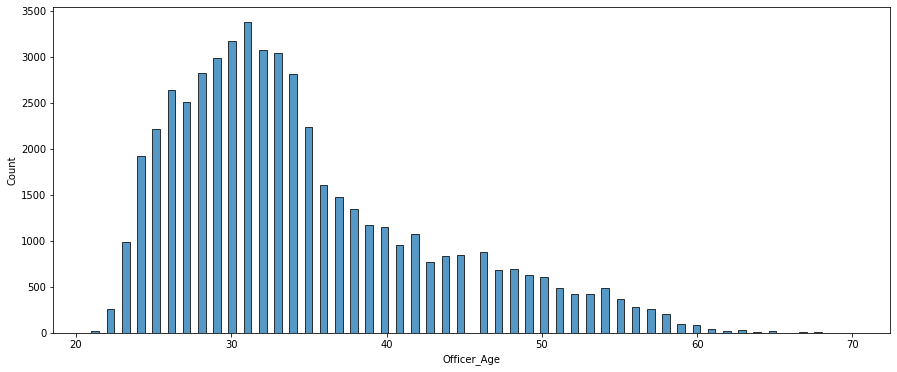

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(df['Officer_Age'], bins=100)